# 모델 평가와 성능향상

### 모델 평가와 매개변수 선택
1. 지도 학습 모델을 평가 : train_test_split 함수
    - 데이터셋을 훈련세트와 테스트 세트로 나눔
2. 모델을 만들기 위해 훈련세트에 fit 메서드 적용
3. 모델 평가를 위해 테스트 세트에 score 메서드 사용
4. 분류에서 score메서드는 정확히 분류된 샘플의 비율을 계산

In [2]:
# 폰트
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

# 경고무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1]:
# preamble
import sklearn
from preamble import *
import matplotlib

In [5]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X,y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print(f'테스트 세트 점수 {logreg.score(X_test, y_test) : .2f}')

테스트 세트 점수  0.88


# 1. 겹 교차 검증
1. 단순한 k-겹 교차 검증
2. 계층별 k-겹 교차 검증

[참고블로그](https://nonmeyet.tistory.com/entry/KFold-Cross-Validation%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D-%EC%A0%95%EC%9D%98-%EB%B0%8F-%EC%84%A4%EB%AA%85)

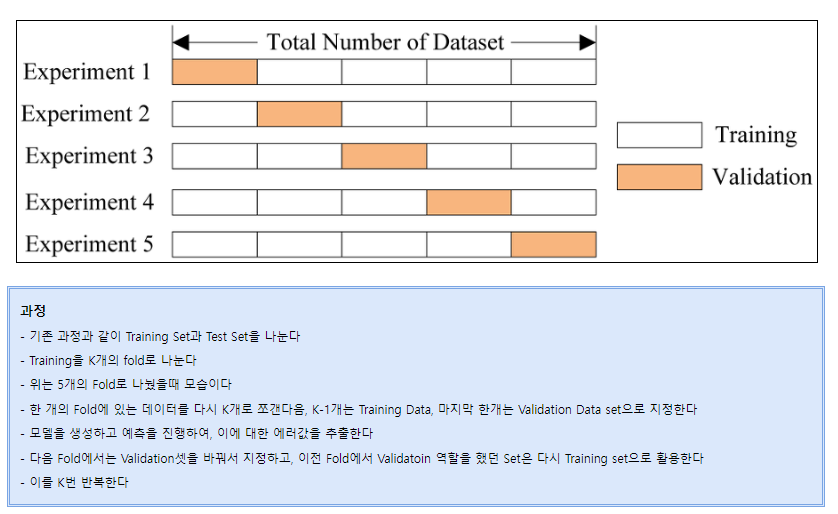

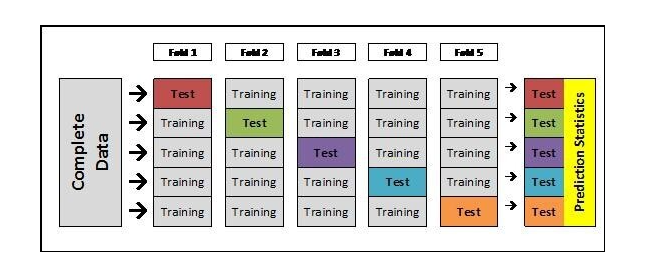

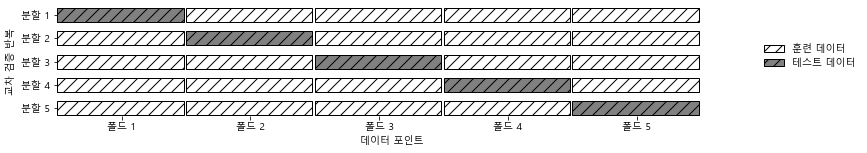

In [6]:
mglearn.plots.plot_cross_validation()

# 1-1.scikit-learn의 교차검증
- max_iter: Gradient Descent 방식으로 최적의 해를 구하는 하이퍼 파라미터로 일정 수준이상이 되면 수렴되어 더이상 오르지 않는다

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg =LogisticRegression(max_iter=100) # 계산에 사용할 작업 수

scores = cross_val_score(logreg, iris.data, iris.target)
print(f"교차 검증 점수: {scores}")

scores = cross_val_score(logreg , iris.data, iris.target, cv=10) 
print(f'10겹 만들어서 교차검증 {scores}')

print(f'10겹 교차 검증 평균 {scores.mean()}')

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

교차 검증 점수: [0.967 1.    0.933 0.967 1.   ]
10겹 만들어서 교차검증 [1.    0.933 1.    1.    0.933 0.933 0.933 1.    1.    1.   ]
10겹 교차 검증 평균 0.9733333333333334


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores)

scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.967 1.    0.933 0.967 1.   ]
교차 검증 점수: [1.    0.933 1.    1.    0.933 0.933 0.933 1.    1.    1.   ]


In [16]:
# 시간이 나오는 cross_validate라는게 있다
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target,
                     return_train_score=True)
res

{'fit_time': array([0.014, 0.019, 0.014, 0.014, 0.014]),
 'score_time': array([0.   , 0.   , 0.001, 0.   , 0.   ]),
 'test_score': array([0.967, 1.   , 0.933, 0.967, 1.   ]),
 'train_score': array([0.967, 0.967, 0.983, 0.983, 0.975])}

In [17]:
res_df = pd.DataFrame(res)
display(res_df)
print(f"평균 시간과 점수: \n {res_df.mean()}")

,fit_time,score_time,test_score,train_score
0,0.01,0.00e+00,0.97,0.97
1,0.02,0.00e+00,1.00,0.97
2,0.01,9.98e-04,0.93,0.98
3,0.01,0.00e+00,0.97,0.98
4,0.01,0.00e+00,1.00,0.97


평균 시간과 점수: 
 fit_time       1.49e-02
score_time     2.00e-04
test_score     9.73e-01
train_score    9.75e-01
dtype: float64


# 1-2.교차 검증의 장점
- 총 데이터 갯수가 적은 데이터 셋에 대하여 정확도를 향상 시킬 수 있다.
- Training / Validation / Test 세 개의 집단으로 분류하는 것보다 train, test로만 분류할 때 학습 데이터 셋이 더 많이 때문에
    - 데이터 수가 적은데 검증과 테스트에 데이터를 뺏기면 언더핏팅 등 성능이 미달되는 모델이 학습될 수 있다.

# 1-3. 계층별 k-겹 교차 검증
#### 단순한 k-겹 검증에는 문제가 있으니, scikit-learn은 분류일 경우 이 방법 대신 계층별 k-겹 교차 검증을 사용한다.

- n_splits : 분할할 세트의 개수, 1세트만 test 데이터로 사용하고 나머지는 train 데이터로 사용
- shuffle : True로 설정 시 데이터셋 내의 순서를 섞어서 샘플링, False인 경우 순서대로 분할

- random_state : seed 설정, 특정 정수로 지정 시 샘플링 결과 고정


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris 레이블:\n", iris.target)

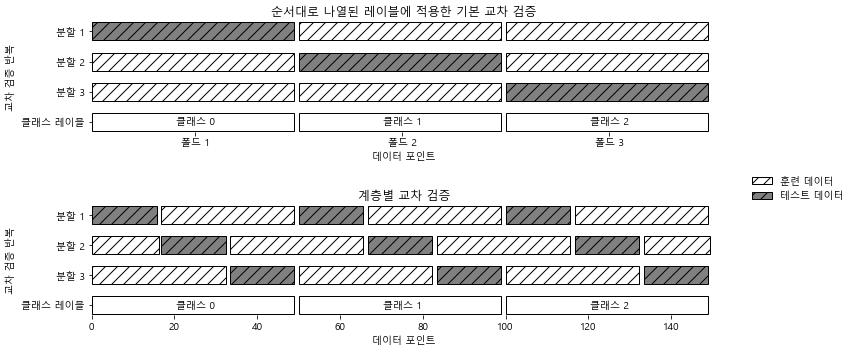

In [18]:
mglearn.plots.plot_stratified_cross_validation()

In [21]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print(f'교차 검증 점수: \n {cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

kfold = KFold(n_splits=3) 
print(f'교차 검증 점수: \n {cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

교차 검증 점수: 
 [1.    1.    0.867 0.933 0.833]
교차 검증 점수: 
 [0. 0. 0.]


- n_splits=3일 때 각 폴드는 iris 데이터셋의 클래스 중 하나에 대응하므로 아무것도 학습할 수 없다.
- 데이터를 섞어서 샘플의 순서를 랜덤하게 만든다 (KFold의 shuffle 매개변수를 True)

In [22]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0) 
print(f'교차 검증 점수: \n {cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

교차 검증 점수: 
 [0.98 0.96 0.96]


# 1-4. 

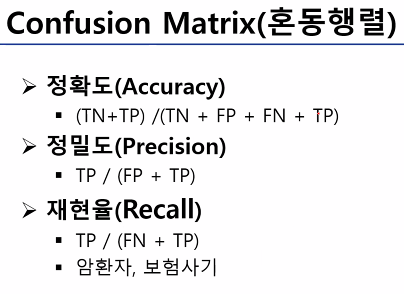